In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
import os
import pandas as pd
from tqdm.notebook import tqdm

from Bio import pairwise2

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

from missense_kinase_toolkit.databases import (
    scrapers,
    uniprot,
    pfam,
    klifs,
)

%matplotlib inline

In [3]:
df_kinhub = scrapers.kinhub()
df_tk = df_kinhub.loc[df_kinhub["Group"] == "TK", ].reset_index(drop=True)

In [4]:
df_pfam = pd.DataFrame()
for index, row in tqdm(df_tk.iterrows(), total = df_tk.shape[0]):
    df_temp = pfam.Pfam(row["UniprotID"])._pfam
    df_pfam = pd.concat([df_pfam, df_temp]).reset_index(drop=True)

df_pfam["uniprot"] = df_pfam["uniprot"].str.upper()

  0%|          | 0/90 [00:00<?, ?it/s]

In [5]:
# df_pfam.loc[df_pfam["name"].apply(lambda x: "kinase" in str(x).lower()), "name"].value_counts()
df_pfam_kinase = df_pfam.loc[df_pfam["name"] == "Protein tyrosine and serine/threonine kinase", ].reset_index(drop=True)

In [6]:
df_tk["Sequence"] = df_tk["UniprotID"].apply(lambda x: uniprot.UniProt(x)._sequence)
df_tk = df_tk.merge(df_pfam_kinase[["uniprot", "start", "end"]], 
                    left_on="UniprotID", right_on="uniprot", how="left")
df_tk.drop(columns="uniprot", inplace=True)

In [7]:
list_kd = []
for index, row in tqdm(df_tk.iterrows(), total = df_tk.shape[0]):
    list_kd.append(row["Sequence"][row["start"]:row["end"]])
df_tk["KD"] = list_kd

  0%|          | 0/90 [00:00<?, ?it/s]

In [8]:
list_pocket = []
for index, row in tqdm(df_tk.iterrows(), total = df_tk.shape[0]):
    list_pocket.append(klifs.KinaseInfo(row["HGNC Name"])._kinase_info["pocket"])
df_tk["KLIFS_pocket"] = list_pocket

  0%|          | 0/90 [00:00<?, ?it/s]

In [9]:
list_fam = df_tk["Family"].to_list()
df_tk["Family"] = [i if "Jak" not in i else "Jak" for i in list_fam]

df_family = pd.DataFrame(df_tk["Family"].value_counts())
list_top_fam = df_family.loc[df_family["count"] > 2, ].index.tolist()

list_col = [i if i in list_top_fam else "Other" for i in list_fam]

list_pcs_cols = ["#002D9C",
                 "#FA4D56",
                 "#007D79",
                 "#D12771",
                 "#33B1FF",
                 "#8A3FFC",
                 "#6FDC8C",
                 "#FF7EB6",
                 "#FFF68F",
                 "#08BDBA",
                 "#BAE6FF",
                 "#FFA166",
                 "#D4BBFF"]

dict_pcs = dict(zip(set(list_col), list_pcs_cols))

row_colors = pd.DataFrame(list_col)[0].map(dict_pcs).to_list()

In [10]:
# https://www.geeksforgeeks.org/biopython-pairwise-alignment/
dict_alignments = dict()
for _, row1 in tqdm(df_tk.iterrows(), total=df_tk.shape[0]):
    dict_seq = dict()
    for _, row2 in tqdm(df_tk.iterrows(), total=df_tk.shape[0], leave=False):
        seq1, seq2 = row1["KD"], row2["KD"]
        alignments = pairwise2.align.globalxx(seq1, seq2)
        dict_seq[row2["HGNC Name"]] = max([alignment.score for alignment in alignments]) / len(seq1)
    dict_alignments[row1["HGNC Name"]] = dict_seq

df_kd_pairwise = pd.DataFrame(dict_alignments)

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

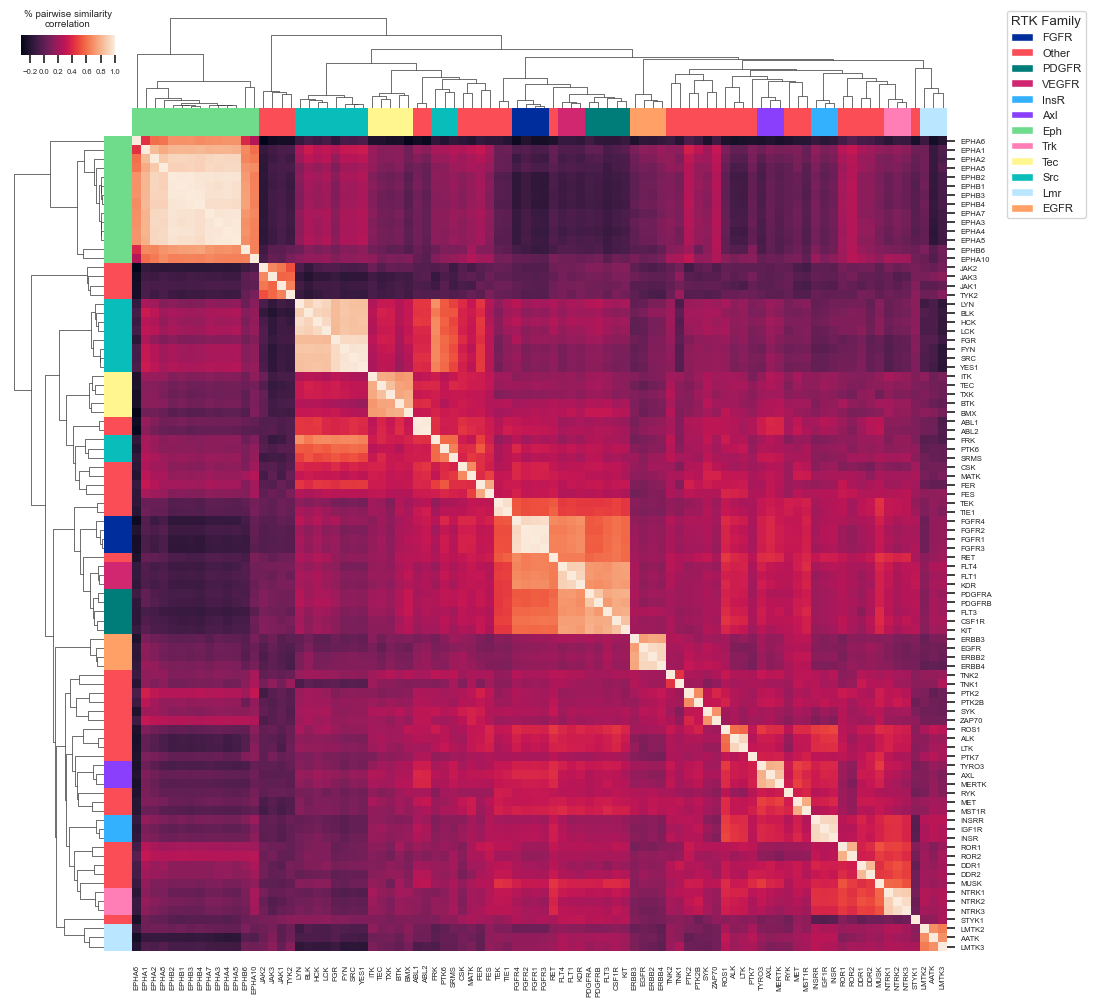

In [11]:
sns.set(font_scale=0.5)

kws = dict(cbar_kws=dict(ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0], orientation='horizontal'))

sns_plot = sns.clustermap(df_kd_pairwise.corr(),
                          dendrogram_ratio=0.1,
                          xticklabels=True,
                          yticklabels=True,
                          **kws,
                          row_colors=row_colors,
                          col_colors=row_colors);
x0, _y0, _w, _h = sns_plot.cbar_pos
sns_plot.ax_cbar.set_position([x0, 0.95, sns_plot.ax_row_dendrogram.get_position().width, 0.02])
sns_plot.ax_cbar.set_title("% pairwise similarity\ncorrelation", fontsize=7)

sns.set(font_scale=0.8)
handles = [Patch(facecolor=dict_pcs[target],
                 label=target) for target in dict_pcs]
sns_plot.ax_row_dendrogram.legend(bbox_to_anchor=(1, 1),
                                  loc="upper left",
                                  title="RTK Family",
                                  facecolor="white",
                                  fontsize=8,
                                  bbox_transform=sns_plot.fig.transFigure,
                                  handles=handles,
                                  frameon=True);
sns_plot.figure.savefig("rtk_kd_corr.svg", bbox_inches="tight")

In [12]:
## InsR KLIFS pocket has a gap - need to remove "-" for alignment algorithm
# df_tk.loc[df_tk["KLIFS_pocket"].apply(lambda x: "-" in x), ]
dict_alignments = dict()
for _, row1 in tqdm(df_tk.iterrows(), total=df_tk.shape[0]):
    dict_seq = dict()
    for _, row2 in tqdm(df_tk.iterrows(), total=df_tk.shape[0], leave=False):
        seq1, seq2 = row1["KLIFS_pocket"], row2["KLIFS_pocket"]
        seq1 = "".join([i for i in seq1 if i != "-"])
        seq2 = "".join([i for i in seq2 if i != "-"])
        alignments = pairwise2.align.globalxx(seq1, seq2)
        dict_seq[row2["HGNC Name"]] = max([alignment.score for alignment in alignments]) / len(seq1)
    dict_alignments[row1["HGNC Name"]] = dict_seq

df_klifs_pairwise = pd.DataFrame(dict_alignments)

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

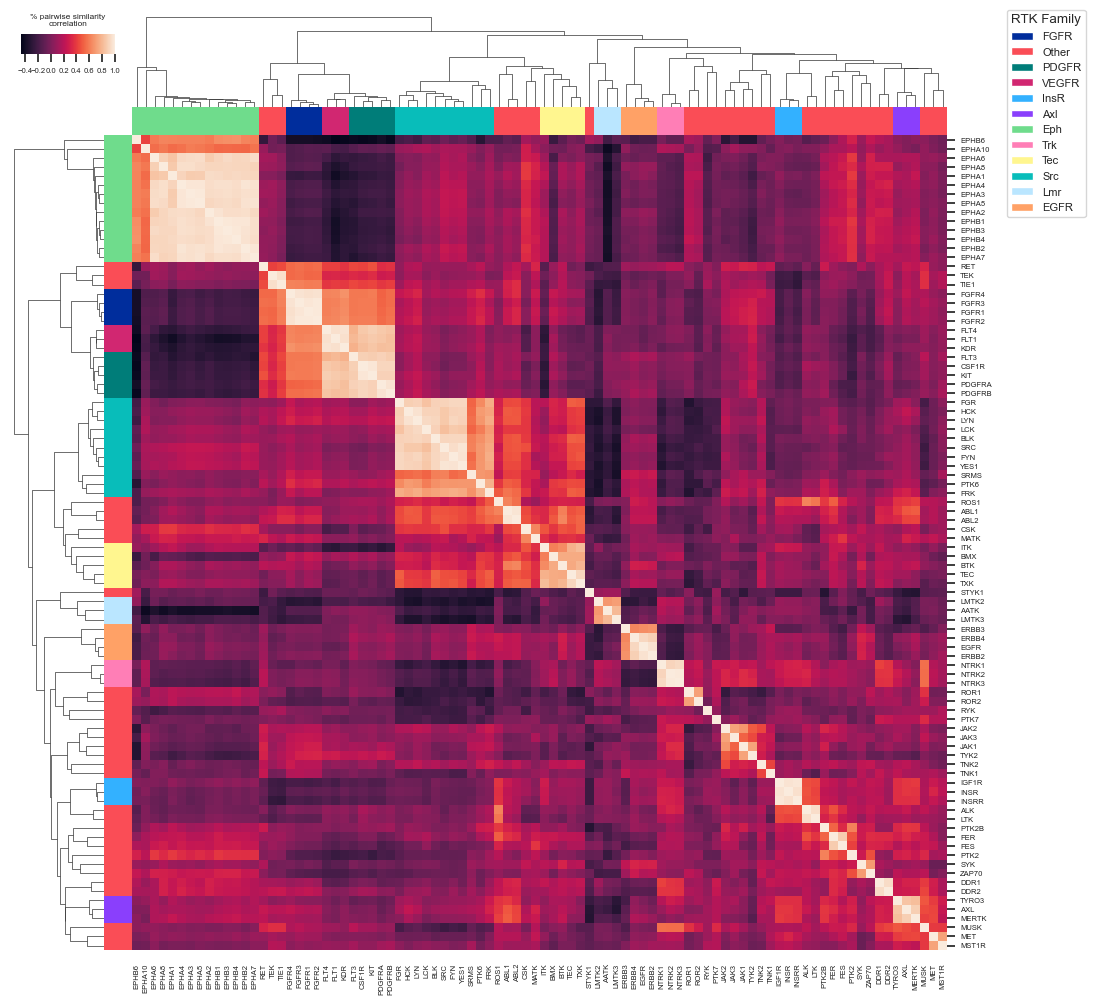

In [13]:
sns.set(font_scale=0.5)

kws = dict(cbar_kws=dict(ticks=[-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0], orientation='horizontal'))

sns_plot = sns.clustermap(df_klifs_pairwise.corr(),
                          dendrogram_ratio=0.1,
                          xticklabels=True,
                          yticklabels=True,
                          **kws,
                          row_colors=row_colors,
                          col_colors=row_colors);
x0, _y0, _w, _h = sns_plot.cbar_pos
sns_plot.ax_cbar.set_position([x0, 0.95, sns_plot.ax_row_dendrogram.get_position().width, 0.02])
sns_plot.ax_cbar.set_title("% pairwise similarity\ncorrelation", fontsize=6)

sns.set(font_scale=0.8)
handles = [Patch(facecolor=dict_pcs[target],
                 label=target) for target in dict_pcs]
sns_plot.ax_row_dendrogram.legend(bbox_to_anchor=(1, 1),
                                  loc="upper left",
                                  title="RTK Family",
                                  facecolor="white",
                                  fontsize=8,
                                  bbox_transform=sns_plot.fig.transFigure,
                                  handles=handles,
                                  frameon=True);
sns_plot.figure.savefig("rtk_klifs_corr.svg", bbox_inches="tight")